In [3]:
from skimage.color import rgb2gray    # rgb to gray scale conversion
import numpy as np
import cv2                            # Read write show image
import matplotlib.pyplot as plt
from scipy import ndimage             # Multi dimensional image processing
from PIL import Image
import copy

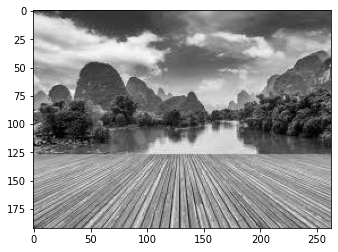

In [5]:
# Loading a sample image

images = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\bw.jpeg')
image = copy.deepcopy(images)                      # To get permission for changes with image
plt.imshow(image,cmap = "gray")

(50496,)


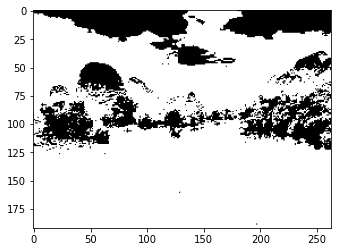

In [6]:
#<----- single threshold without library ----->
image_r = image.reshape(image.shape[0] * image.shape[1])        
print(image_r.shape)

for i in range(image_r.shape[0]):
    if(image_r[i] > image_r.mean()):
        image_r[i] = 1
    else:
        image_r[i] = 0

image_binary = image_r.reshape(image.shape[0],image.shape[1])
plt.imshow(image_binary,cmap = 'gray')

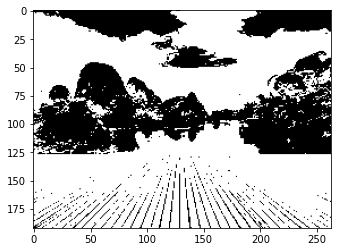

In [7]:
#<--------- single threshold using cv library---------->
images = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\bw.jpeg')
image = copy.deepcopy(images)            # To get permission for changes with image
plt.imshow(image,cmap = "gray")
ret,thresh1 = cv2.threshold(image,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap = "gray")

mean is 129.23811787072242
max is  251
min is  0


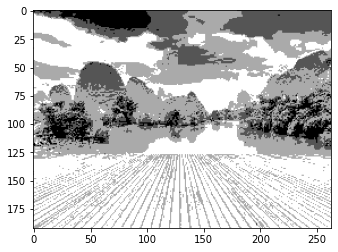

In [9]:
#<----------------------------------------------------------------->
# Mutiple threshold

images = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\bw.jpeg')
image = copy.deepcopy(images)            # To get permission for changes with image

image_r = image.reshape(image.shape[0]*image.shape[1])
print("mean is",image_r.mean())
print("max is ",image_r.max())
print("min is ",image_r.min())

(image_r.mean() + image_r.max())/2   # upper half
(image_r.mean() + image_r.min())/2   # lower half


for i in range(image_r.shape[0]):
    if image_r[i] > (image_r.mean() + image_r.max())/2:
        image_r[i] = 3 # not sure what should be the pixel value
    elif image_r[i] > image_r.mean():
        image_r[i] = 2
    elif image_r[i] > (image_r.mean() + image_r.min())/2:
        image_r[i] = 1
    else:
        image_r[i] = 0
image_multiple = image_r.reshape(image.shape[0],image.shape[1])
plt.imshow(image_multiple, cmap='gray')


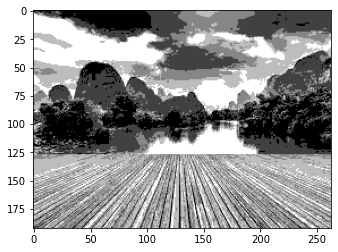

In [11]:
#<-------------------kmeans------------------->
images = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\bw.jpeg')/255           
image = copy.deepcopy(images)              # To get permission for changes with image
image.shape
image_n = image.reshape(image.shape[0] * image.shape[1],1)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=0).fit(image_n)

pic_show = kmeans.cluster_centers_[kmeans.labels_]   

cluster_pic = pic_show.reshape(image.shape[0],image.shape[1])
plt.imshow(cluster_pic,cmap = "gray")